In [8]:
import pandas as pd

In [3]:
# # Load the .ts files into DataFrames
# als1 = pd.read_csv("als1.ts", sep="\t", header=None)
# als2 = pd.read_csv("als2.ts", sep="\t", header=None)
# als3 = pd.read_csv("als3.ts", sep="\t", header=None)
# control1 = pd.read_csv("control1.ts", sep="\t", header=None)
# control2 = pd.read_csv("control2.ts", sep="\t", header=None)
# control3 = pd.read_csv("control3.ts", sep="\t", header=None)
# hunt1 = pd.read_csv("hunt1.ts", sep="\t", header=None)
# hunt2 = pd.read_csv("hunt2.ts", sep="\t", header=None)
# hunt3 = pd.read_csv("hunt3.ts", sep="\t", header=None)
# park1 = pd.read_csv("park1.ts", sep="\t", header=None)
# park2 = pd.read_csv("park2.ts", sep="\t", header=None)
# park3 = pd.read_csv("park3.ts", sep="\t", header=None)

# # Save them as CSV files
# als1.to_csv("als1.csv", index=False, header=False)
# als2.to_csv("als2.csv", index=False, header=False)
# als3.to_csv("als3.csv", index=False, header=False)
# control1.to_csv("control1.csv", index=False, header=False)
# control2.to_csv("control2.csv", index=False, header=False)
# control3.to_csv("control3.csv", index=False, header=False)
# hunt1.to_csv("hunt1.csv", index=False, header=False)
# hunt2.to_csv("hunt2.csv", index=False, header=False)
# hunt3.to_csv("hunt3.csv", index=False, header=False)
# park1.to_csv("park1.csv", index=False, header=False)
# park2.to_csv("park2.csv", index=False, header=False)
# park3.to_csv("park3.csv", index=False, header=False)

# print("Files have been successfully converted to CSV.")

In [10]:
# Load the CSV files without specifying the separator
als1 = pd.read_csv("csv_files/als1.csv", header=None)
als2 = pd.read_csv("csv_files/als2.csv", header=None)
als3 = pd.read_csv("csv_files/als3.csv", header=None)
control1 = pd.read_csv("csv_files/control1.csv", header=None)
control2 = pd.read_csv("csv_files/control2.csv", header=None)
control3 = pd.read_csv("csv_files/control3.csv", header=None)
hunt1 = pd.read_csv("csv_files/hunt1.csv", header=None)
hunt2 = pd.read_csv("csv_files/hunt2.csv", header=None)
hunt3 = pd.read_csv("csv_files/hunt3.csv", header=None)
park1 = pd.read_csv("csv_files/park1.csv", header=None)
park2 = pd.read_csv("csv_files/park2.csv", header=None)
park3 = pd.read_csv("csv_files/park3.csv", header=None)

In [16]:
# files = [als1, als2, als3, control1, control2, control3, 
#          hunt1, hunt2, hunt3, park1, park2, park3]

# column_names = [
#     "Elapsed Time (sec)",
#     "Left Stride Interval (sec)",
#     "Right Stride Interval (sec)",
#     "Left Swing Interval (sec)",
#     "Right Swing Interval (sec)",
#     "Left Swing Interval (% of stride)",
#     "Right Swing Interval (% of stride)",
#     "Left Stance Interval (sec)",
#     "Right Stance Interval (sec)",
#     "Left Stance Interval (% of stride)",
#     "Right Stance Interval (% of stride)",
#     "Double Support Interval (sec)",
#     "Double Support Interval (% of stride)"
# ]

# for i in files:
#     i.columns = column_names




AttributeError: 'DataFrame' object has no attribute 'split'

In [36]:
import glob

# Load all CSV files and assign group labels
data_files = ['csv_files/als1.csv', 'csv_files/control1.csv', 'csv_files/hunt1.csv', 'csv_files/park1.csv']
data_list = []

for file in data_files:
    df = pd.read_csv(file)
    group = file.split("/")[-1].split("1")[0]  # Extract group name (als, control, hunt, park)
    if group == 'control':
        group = 'healthy'
    if group == 'hunt':
        group = 'huntington'
    if group == 'park':
        group = 'parkinsons'
    df["Group"] = group
    data_list.append(df)

# Combine all data
data = pd.concat(data_list, ignore_index=True)

In [37]:
data.columns

Index(['Elapsed_Time', 'Left_Stride_Interval', 'Right_Stride_Interval',
       'Left_Swing_Interval', 'Right_Swing_Interval',
       'Left_Swing_Interval_Percent', 'Right_Swing_Interval_Percent',
       'Left_Stance_Interval', 'Right_Stance_Interval',
       'Left_Stance_Interval_Percent', 'Right_Stance_Interval_Percent',
       'Double_Support_Interval_Sec', 'Double_Support_Interval_Percent',
       'Group'],
      dtype='object')

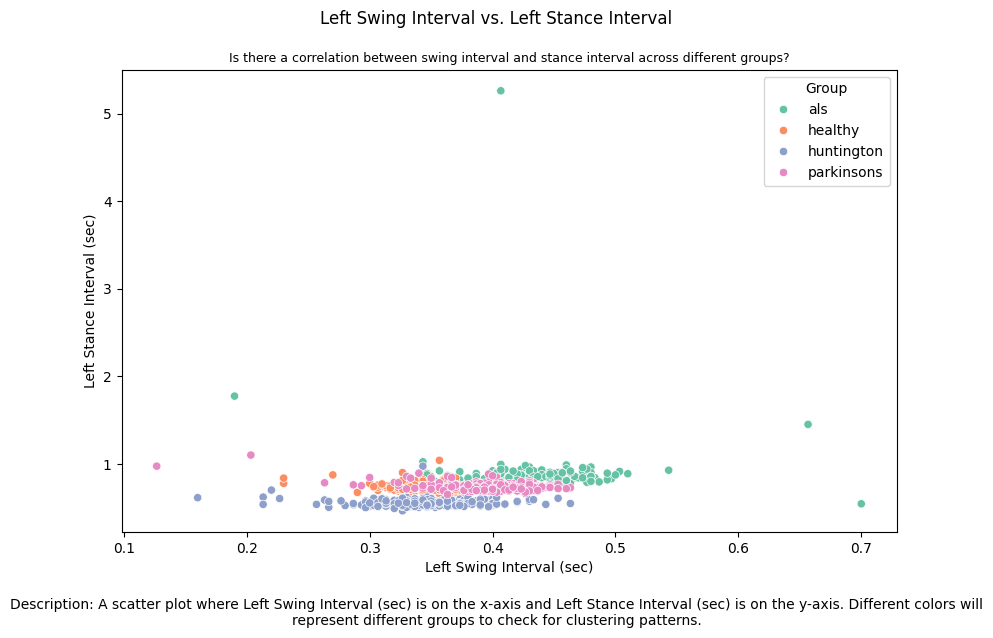

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Left_Swing_Interval', y='Left_Stance_Interval', hue='Group', data=data, palette='Set2')
plt.suptitle('Left Swing Interval vs. Left Stance Interval')
plt.title('Is there a correlation between swing interval and stance interval across different groups?', fontsize=9)
plt.xlabel('Left Swing Interval (sec)')
plt.ylabel('Left Stance Interval (sec)')
plt.legend(title='Group')
plt.figtext(0.5, 0, 'Description: A scatter plot where Left Swing Interval (sec) is on the x-axis and Left Stance Interval (sec) is on the y-axis. Different colors will represent different groups to check for clustering patterns.', 
            ha='center', va='top', fontsize=10, wrap=True)
plt.show()